<a href="https://colab.research.google.com/github/fulllz/DSProjects/blob/main/Project_2_Developing_machine_learning_model_to_predict_future_churning_customers_with_telecom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2
# **Developing machine learning model to predict future churning customers with telecom dataset**

Machine learning is a field that intersects between computer science and statistics. Companies use machine learning(ML) based methods for customer churn prediction since it is more profitable to keep existing customers compared to attracting new ones. It makes sense for companies to try to predict leaving customers and try to prevent them from leaving or decreasing purchases. Customer churn prediction is a form of customer relationship management that uses machine learning to predict whether a customer is going to leave the company or not. It is studied very common across different industries such as telecommunications, retail markets, subscription management, financial services and electronic commerce. The goal in the Project 2 is to study the churn prediction and apply the knowledge in the case of a Telecom company(dataset could find in kaggle). The typical analysis for a classification problem is shown:

#### 1. Data Preparation
#### 2. Exploratory Data Analysis
#### 3. Feature Engineering
#### 4. Modeling

A comparison among machine learning models was made. Dataset with imbalance issues in churn rates was explored. After running the models: Logistic Regression, KNeighbors Classifier, Decision Tree Classifier, Naive Bayes,  Surport Vector Machine, Random Forest, Gradient Boosting and XGBoost Classifier, it was found that XGBoost was the top-performing model. The evaluation was done by using different metrics such as accuracy, recall, precision, F-score, AUC-score, Kappa_metric, confusion matrix, ROC-curve and precision-recall curve. 

### Best Results : 95% accuracy



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

import itertools
import imblearn.under_sampling as u
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score, precision_score, recall_score, cohen_kappa_score

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [2]:
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)
plt.style.use('ggplot')

## 1. Data Preparation

The dataset on Telecom Churn analysis had 7043 rows and 21 columns. The feature variables in the dataset had information about customer demographics (like gender, age etc.), information about the services customers have subscribed for and the cost incurred by the customer. The dataset had few missing values which were dropped reducing the dataset to 7032 rows and 21 columns.

In [3]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/fulllz/DSProjects/main/Telco-Customer-Churn.csv")
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check the data types and found "TotalCharges" type is wrong. changeing "obejct" to "float64"
df_raw.TotalCharges = pd.to_numeric(df_raw.TotalCharges, errors='coerce') 
df_raw.TotalCharges.astype(float) # Change TotalCharges "obejct" to "float64" 
df_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
# Check the columns with missing values 
df_raw[df_raw.isnull().any(axis=1)].head()
print(df_raw.isnull().sum()) 
# "TotalCharges" column has 11 missing values. I dropped all the NAs
# This is because the missing values' count is less than 5% of total counts
df_raw = df_raw.dropna()
print(df_raw.isnull().sum()) 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
df_raw.rename(columns={'gender':'Gender',
                       'customerID':'CustomerID',
                       'Contract':'ContractType',
                       'InternetService':'InternetServiceType',
                       'tenure':'Tenure'
                      }
              ,inplace=True)  

In [8]:
#understanding the central tendencies of the numeric data with .describe() method 
df_raw[['Tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## 2. Exploratory Data Analysis

In [9]:
#Rename column names and transformed into proper format and return dataframe
df_cal = df_raw.copy()

df_cal.rename(columns={'gender':'Gender'
                       ,'customerID':'CustomerID'
                       ,'Contract':'ContractType'
                       ,'InternetService':'InternetServiceType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)


df_cal['Partner'] = df_cal.Partner.map({'Yes':1,'No':0})
df_cal['Dependents'] = df_cal.Dependents.map({'Yes':1,'No':0})

df_cal['PhoneService'] = df_cal.PhoneService.map({'Yes':1,'No':0})
df_cal['MultipleLines'] = df_cal.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})

df_cal['InternetService'] = df_cal.InternetServiceType.map({'DSL':1,'Fiber optic':1,'No':0})
df_cal['OnlineSecurity'] = df_cal.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
df_cal['OnlineBackup'] = df_cal.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
df_cal['DeviceProtection'] = df_cal.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
df_cal['TechSupport'] = df_cal.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
df_cal['StreamingTV'] = df_cal.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
df_cal['StreamingMovies'] = df_cal.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
df_cal['PaperlessBilling'] = df_cal.PaperlessBilling.map({'Yes':1,'No':0})
df_cal['Churn'] = df_cal.Churn.map({'Yes':1,'No':0})

# Data mining
df_cal['IsContracted'] = df_cal.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})

# Data transformation

# Converting TotalCharges into Numeric, but some of the records are empty, so first we need to deal with them.
df_cal.loc[df_cal['TotalCharges']==' ','TotalCharges'] = np.nan

# First we convert TotalCharges to float and then replace with tenure * monthly charges
df_cal['TotalCharges'] = df_cal['TotalCharges'].astype('float64')
df_cal.loc[df_cal['TotalCharges'].isnull()==True,'TotalCharges'] = df_cal['MonthlyCharges'] * df_cal['Tenure']


In [10]:
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


In [11]:
cat_cols = ["Gender","Partner","Dependents","SeniorCitizen","PhoneService","MultipleLines"
                    ,"InternetServiceType","OnlineSecurity","OnlineBackup","DeviceProtection"
                    ,"TechSupport","StreamingTV","StreamingMovies","IsContracted"
                    ,"ContractType","PaperlessBilling","PaymentMethod"]


num_cols = ["Tenure","MonthlyCharges","TotalCharges"]

target_col = 'Churn'

# spliting categorical columns into Nominal and Binary columns

nominal_cols = ['Gender','InternetServiceType','PaymentMethod','ContractType']

binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity'
               ,'OnlineBackup' ,'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies'
               ,'PaperlessBilling','InternetService', 'IsContracted']

In [12]:
for col in cat_cols:
    display(pd.DataFrame(df_cal[col].value_counts()))
    print()

,Gender
Male,3549
Female,3483


,Partner
0,3639
1,3393


,Dependents
0,4933
1,2099


,SeniorCitizen
0,5890
1,1142


,PhoneService
1,6352
0,680


,MultipleLines
0,4065
1,2967


,InternetServiceType
Fiber optic,3096
DSL,2416
No,1520


,OnlineSecurity
0,5017
1,2015


,OnlineBackup
0,4607
1,2425


,DeviceProtection
0,4614
1,2418


,TechSupport
0,4992
1,2040


,StreamingTV
0,4329
1,2703


,StreamingMovies
0,4301
1,2731


,IsContracted
0,3875
1,3157


,ContractType
Month-to-month,3875
Two year,1685
One year,1472


,PaperlessBilling
1,4168
0,2864


,PaymentMethod
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


,Churn
No,5163
Yes,1869


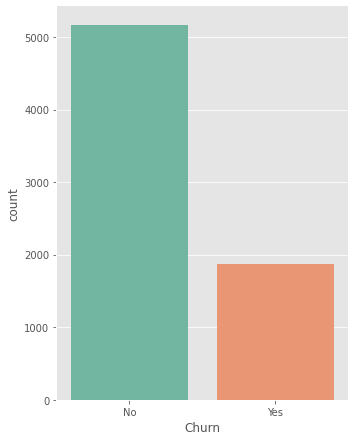

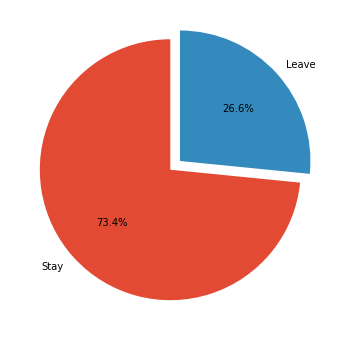

In [13]:
display(pd.DataFrame(df_raw.Churn.value_counts()))

# Check the Churn column count
_ = sns.catplot(x="Churn", kind = "count", data=df_raw, height = 6,
                 palette="Set2",
                 aspect = 0.8)

# Check the Churn %
values = df_raw.Churn.value_counts()
plt.figure(figsize=(6,6))
plt.pie(values, explode = (0,0.1),autopct='%1.1f%%',labels=['Stay','Leave'], 
        shadow=False,startangle=90)
plt.show()

Churn rate of telecom company is around 26%, Meaning around 26% of the subscribers left the company during given interval.

In [14]:
df_cat_plot = df_raw.copy()

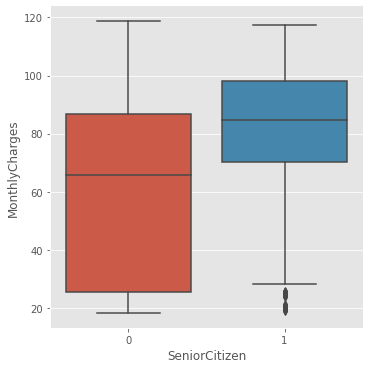

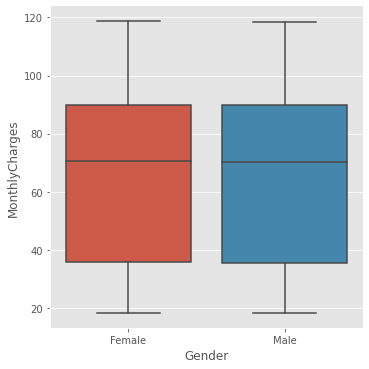

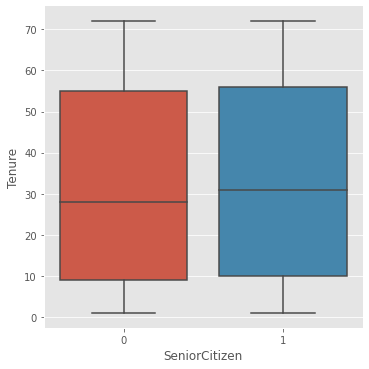

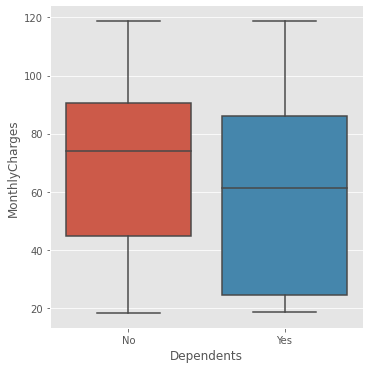

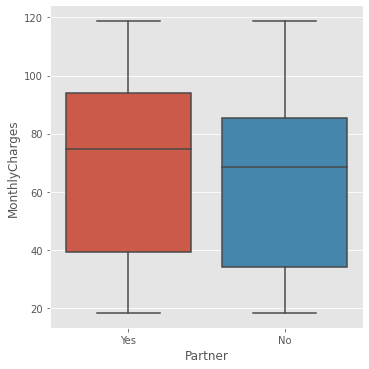

In [15]:
# 4-1) Demographic analysis
# Data preparation
#factorize
df_cat_plot['Churn'] = np.where(df_cat_plot['Churn']=='Yes', 1, 0)
df_cat_plot

sns.catplot(x="SeniorCitizen", y="MonthlyCharges", kind="box", data=df_cat_plot);
# Plot tells that the senior citizen tend to have higher montly charges as compared to younger population

sns.catplot(x="Gender", y="MonthlyCharges", kind="box", data=df_cat_plot);

# Male and females largely have same avg monthly bills

sns.catplot(x="SeniorCitizen", y="Tenure", kind="box", data=df_cat_plot);

# Senior citizen have higher mean tenure as compared to young population young people churn often

sns.catplot(x="Dependents", y="MonthlyCharges", kind="box", data=df_cat_plot);

# People with no dependents have higher avg. monthly bills

sns.catplot(x="Partner", y="MonthlyCharges", kind="box", data=df_cat_plot);

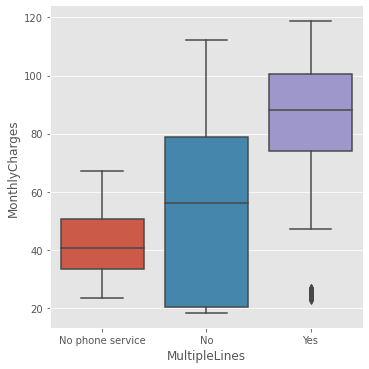

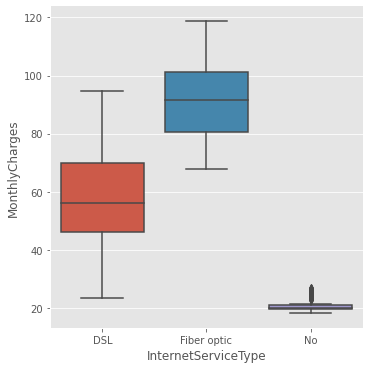

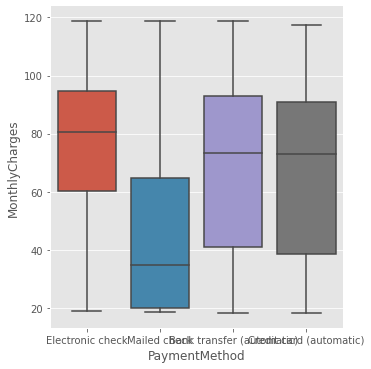

In [16]:
# People with partners have higher avg. monthly bills

sns.catplot(x="MultipleLines", y="MonthlyCharges", kind="box", data=df_cat_plot);

sns.catplot(x="InternetServiceType", y="MonthlyCharges", kind="box", data=df_cat_plot);

# Fiber optics service has very high monthly charges
sns.catplot(x="PaymentMethod", y="MonthlyCharges", kind="box", data=df_cat_plot);

In [17]:
#Comparing <contract vs churn>
churn_table1 = pd.crosstab(index=df_raw['ContractType'],
                          columns=df_raw['Churn'])
churn_table1

Churn,No,Yes
ContractType,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


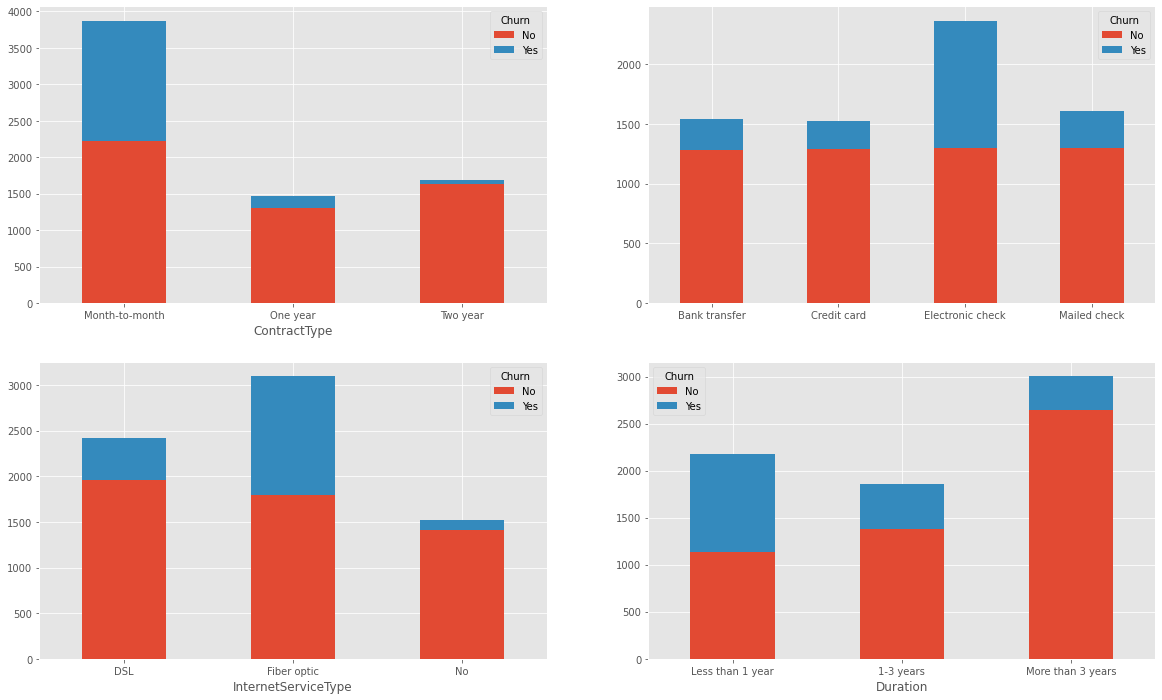

In [18]:
bins = [0,12,36,72]
name = ['Less than 1 year', '1-3 years', 'More than 3 years']
df_raw['Duration'] = pd.cut(df_raw.Tenure, bins, labels=name)

table1 = pd.crosstab(index=df_raw.ContractType, columns=df_raw.Churn)
table2 = pd.crosstab(index=df_raw.PaymentMethod, columns=df_raw.Churn)
table2.index = pd.Series(['Bank transfer','Credit card','Electronic check','Mailed check'])
table3 = pd.crosstab(index=df_raw.InternetServiceType, columns=df_raw.Churn)
table4 = pd.crosstab(index=df_raw.Duration, columns=df_raw.Churn)

fig = plt.figure(figsize=(20,12))
ax1= fig.add_subplot(2,2,1)
table1.plot(ax=ax1, kind="bar", stacked=True)
plt.xticks(rotation=0)
ax2 = plt.subplot(2,2,2)
table2.plot(ax=ax2,kind="bar", stacked=True)
plt.xticks(rotation=0)
ax3 = plt.subplot(2,2,3)
table3.plot(ax=ax3,kind="bar", stacked=True)
plt.xticks(rotation=0)
ax4 = plt.subplot(2,2,4)
table4.plot(ax=ax4,kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.show()

In [19]:
def Create_data_label(ax):
    """ Display data label for given axis """
    for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/ 2
                    , bar.get_height() + 0.01
                    , str(round(100 * bar.get_height(),2)) + '%'
                    , ha = 'center'
                    , fontsize = 13)
            
            
def Categorical_var_churn_dist(data, cols, distribution_col):
    """ Distribution of categorical variable based on target variable """
    
    for i,feature in enumerate(cols):
        
        feature_summary = data[feature].value_counts(normalize=True).reset_index(name='Percentage')
        
        plt_cat = sns.catplot(x=feature
                , y='Percentage'
                , data = feature_summary
                , col=distribution_col
                , kind='bar'
                , aspect = 0.8
                , alpha = 0.6)
        
        if feature == 'PaymentMethod':
            plt_cat.set_xticklabels(rotation= 65, horizontalalignment = 'right')
        
        
        for ax1, ax2 in plt_cat.axes:
            Create_data_label(ax1)
            Create_data_label(ax2)
        
        
        plt.ylim(top=1)
        plt.subplots_adjust(top = 0.9)
        plt.gcf().suptitle(feature+" distribution",fontsize=14)
    plt.show()



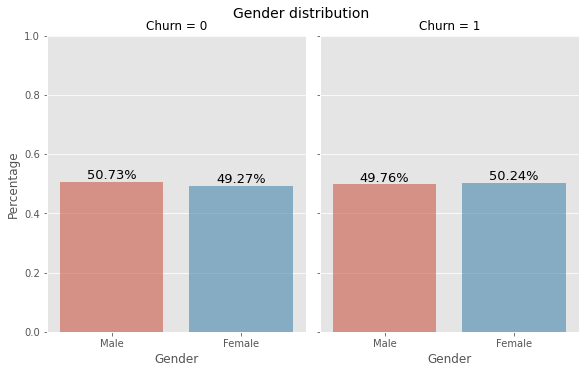

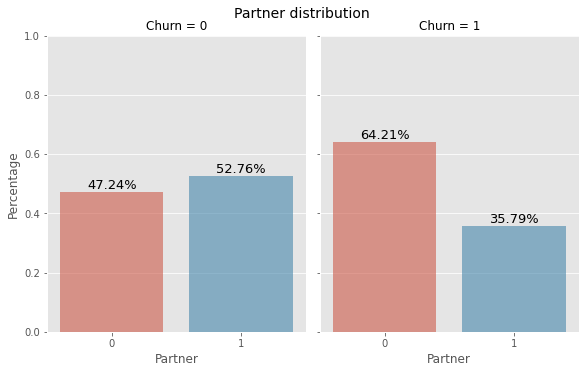

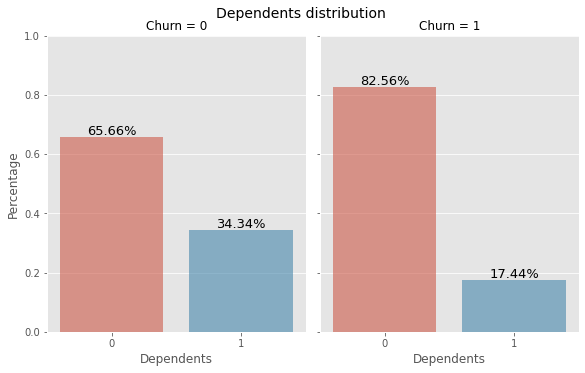

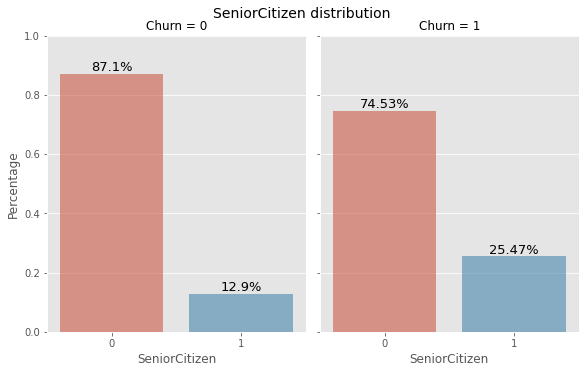

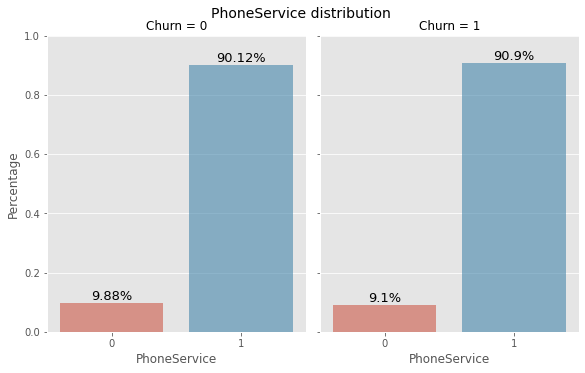

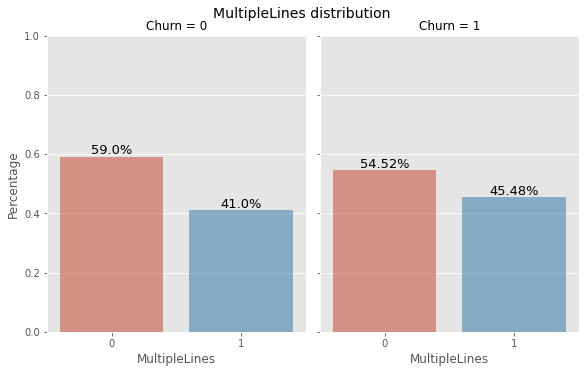

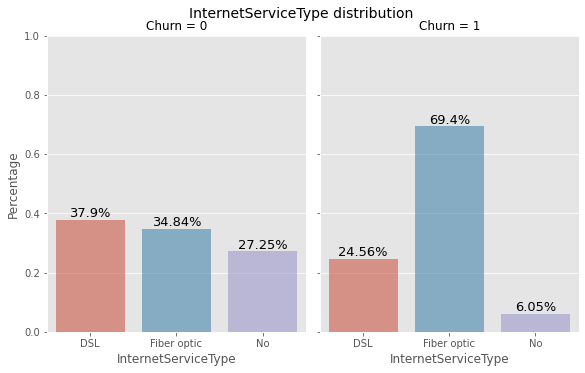

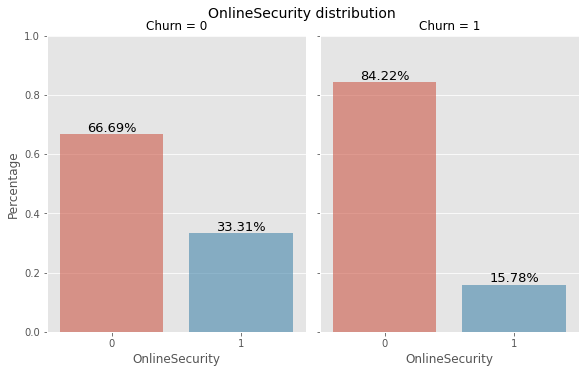

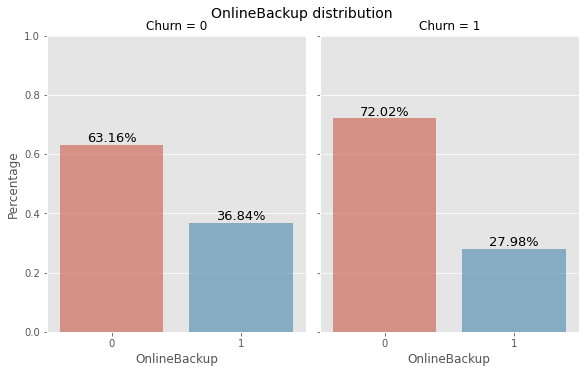

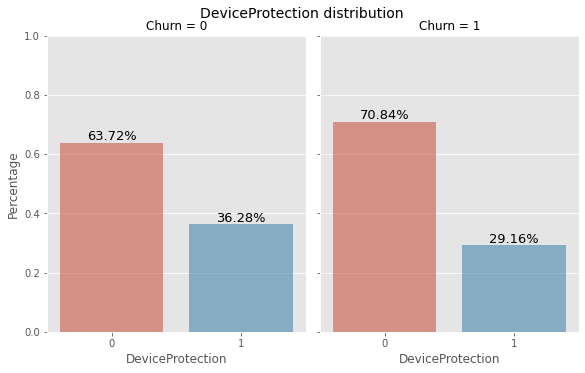

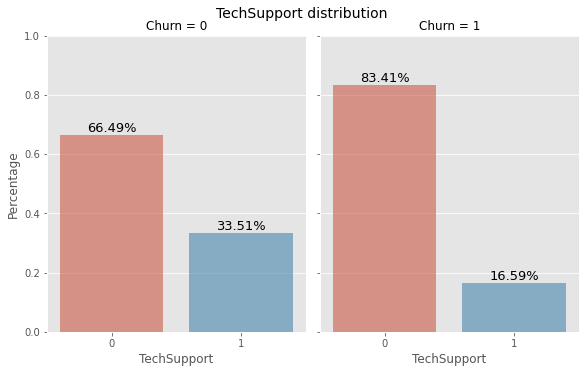

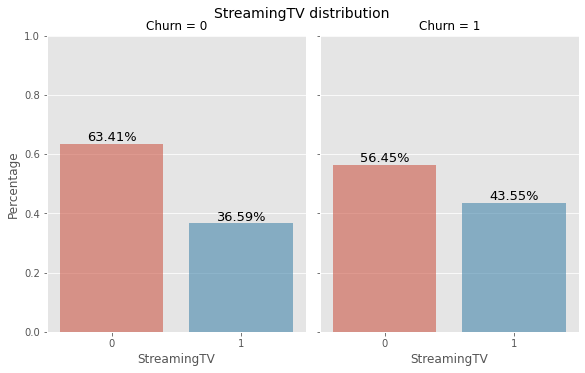

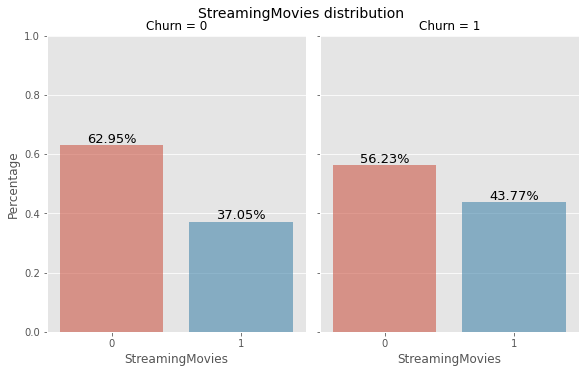

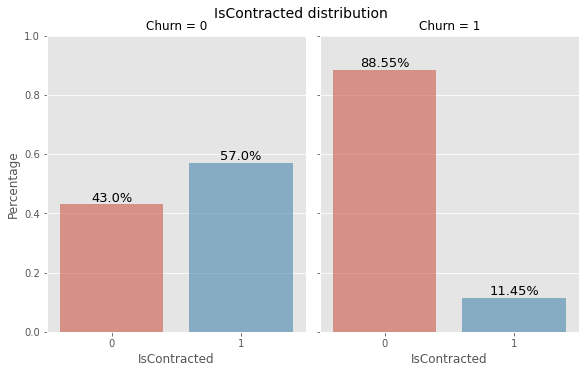

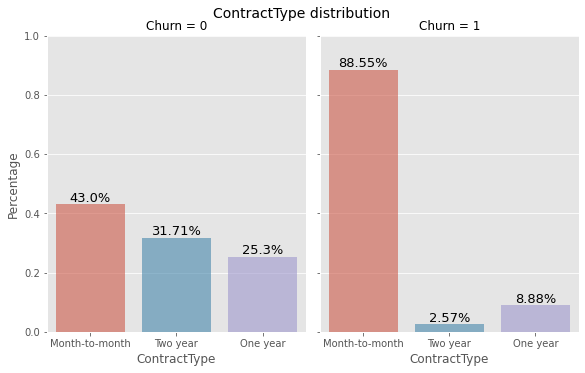

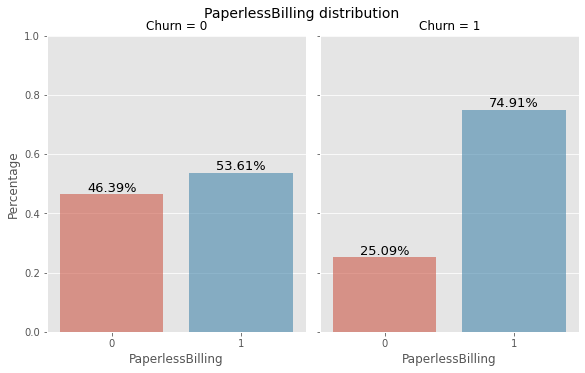

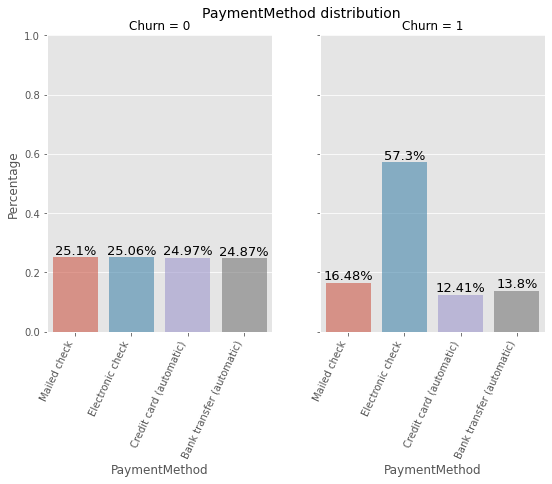

In [20]:
churn_summary = df_cal.groupby('Churn')
Categorical_var_churn_dist(churn_summary, cat_cols,'Churn')

From above analysis, churn customers are likely to 

- not have partners and Dependents; Means likely to be Single.
- have Internet service and specifically Fiber optics
- not have online security service, online backup service, device protection service, Tech support service
- have streaming TV and streaming Movies services
- be with monthly based contract
- have paperless billing service
- have electronic check payment method


#### Distribution of Tenure, Monthly Charges and Total Charges

In [21]:
# Mean summary of customers (Churn vs Non churn)
print(churn_summary['Tenure','MonthlyCharges','TotalCharges'].mean())

          Tenure  MonthlyCharges  TotalCharges
Churn                                         
0      37.650010       61.307408   2555.344141
1      17.979133       74.441332   1531.796094


Result shows that Churn customers have more Monthly charges compared to existing customers. <br>
Also, there is a drastic difference in Tenure and Total Charges for Churn vs existing customers. 
Let's check distribution of each features with target variable.

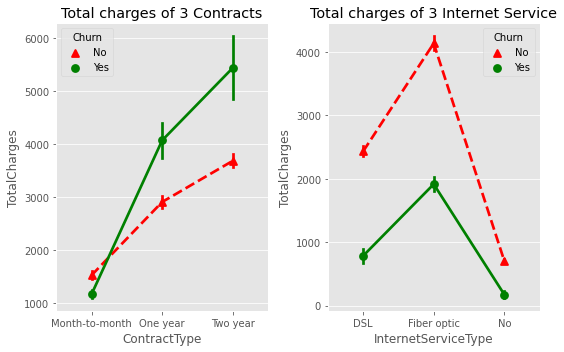

In [22]:
# Check the relationship between Churn and continous coloumns
fig, axs = plt.subplots(ncols=2,figsize=(8,5))
np.random.seed(1)

ax1= sns.pointplot(x="ContractType", y="TotalCharges", hue="Churn", data=df_raw,
                   palette={"No": "r", "Yes": "g"},
                   markers=["^", "o"],
                   linestyles=["--", "-"],
                   ax=axs[0])
ax1.set_title("Total charges of 3 Contracts")

ax2=sns.pointplot(x="InternetServiceType", y="TotalCharges", hue="Churn", data=df_raw, 
                  palette={"No": "r", "Yes": "g"},
                  markers=["^", "o"], 
                  linestyles=["--", "-"],
                  ax=axs[1])
ax2.set_title("Total charges of 3 Internet Service")
plt.tight_layout()
plt.show()

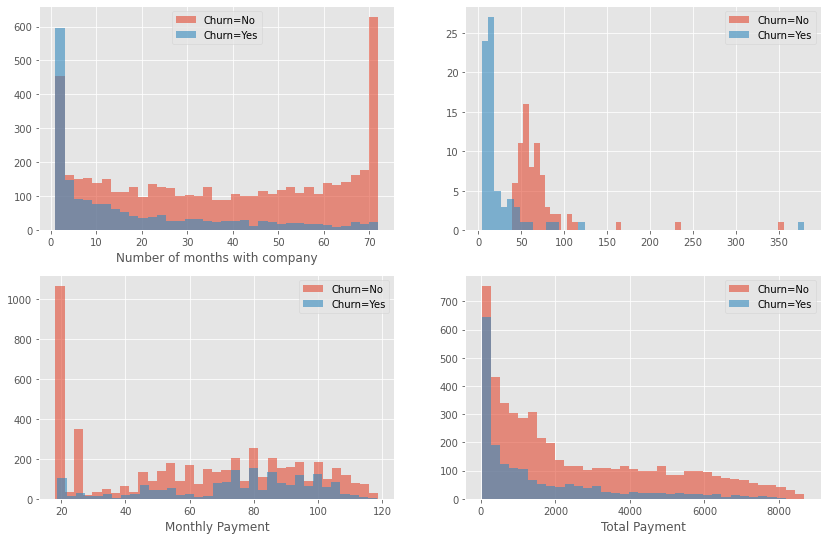

In [23]:
plt.figure(figsize=(14, 14))

plt.subplot(3, 2, 1)
df_raw[df_raw.Churn == 'No'].Tenure.hist(bins=35, alpha=0.6, label='Churn=No')
df_raw[df_raw.Churn == 'Yes'].Tenure.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of months with company')

plt.subplot(3, 2, 2)
df_raw[df_raw.Churn == 'No'].Tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=No')
df_raw[df_raw.Churn == 'Yes'].Tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=Yes')
plt.legend()
# plt.xlabel() Ziru? please see what goes in Label over here!

plt.subplot(3, 2, 3)
df_raw[df_raw.Churn == 'No'].MonthlyCharges.hist(bins=35, alpha=0.6, label='Churn=No')
df_raw[df_raw.Churn == 'Yes'].MonthlyCharges.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.xlabel('Monthly Payment')
plt.legend()

plt.subplot(3, 2, 4)
df_raw[df_raw.Churn == 'No'].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=No')
df_raw[df_raw.Churn == 'Yes'].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.xlabel('Total Payment')
plt.legend()

#### Tenure vs Churn Distribution

In [24]:
def Numerical_distribution(df_cal,feature):
    """ Distribution of numerical variable based on target variable"""
    fig = plt.figure(figsize=(15,10))
    
    plt.subplot(2,1,1)
    ax = sns.kdeplot(df_cal[feature], shade = True)
    
    title_str = "Original " +feature + " Distribution"
    plt.title(title_str)
    
    plt.subplot(2,1,2)
    ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==0) ,feature], shade = True, label='No chrun')
    ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==1),feature], shade = True, label='Chrun')
    
    
    title_str = feature + " Distribution: Churn vs No churn"
    plt.title(title_str)
    plt.show()

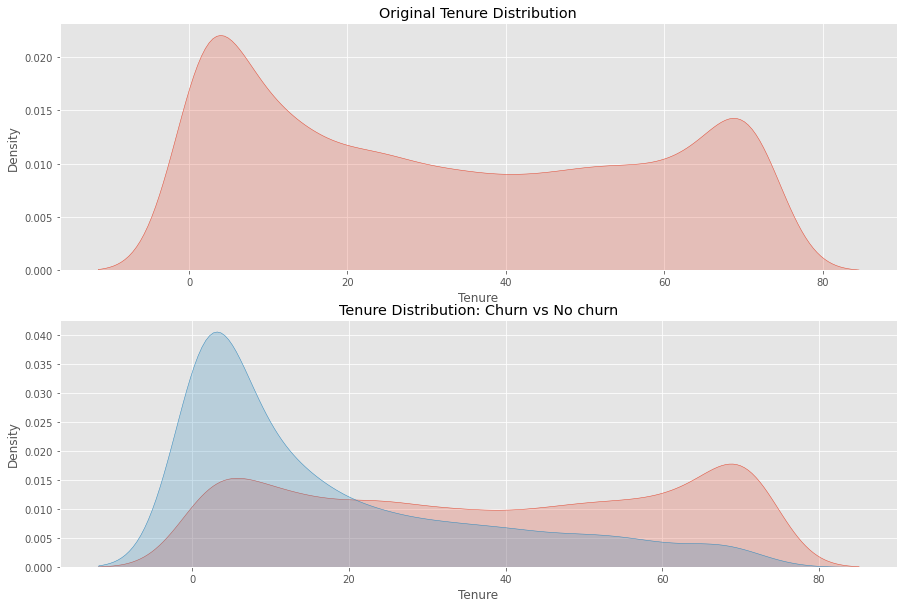

In [25]:
Numerical_distribution(df_cal,'Tenure')

#### MonthlyCharges vs Churn Distribution

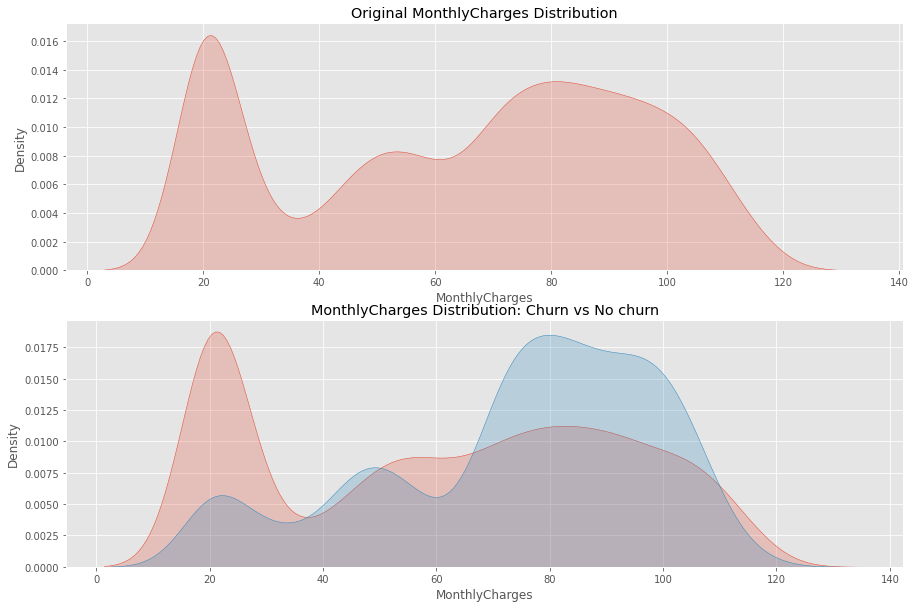

In [26]:
Numerical_distribution(df_cal,'MonthlyCharges')

#### TotalCharges vs Churn Distribution

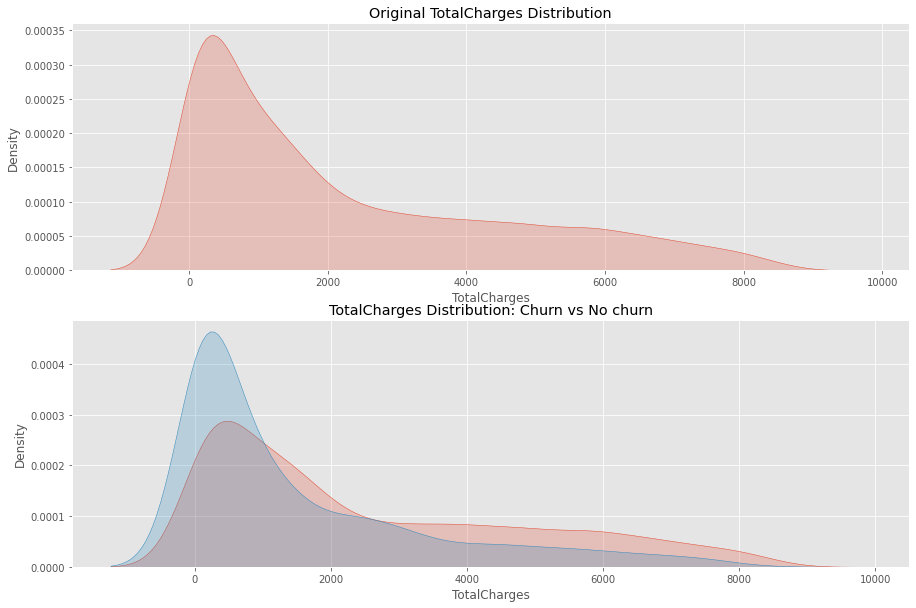

In [27]:
Numerical_distribution(df_cal, 'TotalCharges')

From above distribution, churn subscribers are

- more likely to leave company who's tenure is less than a year
- more likely to have more than $65 monthly charges

In [28]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap('RdYlGn')
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()

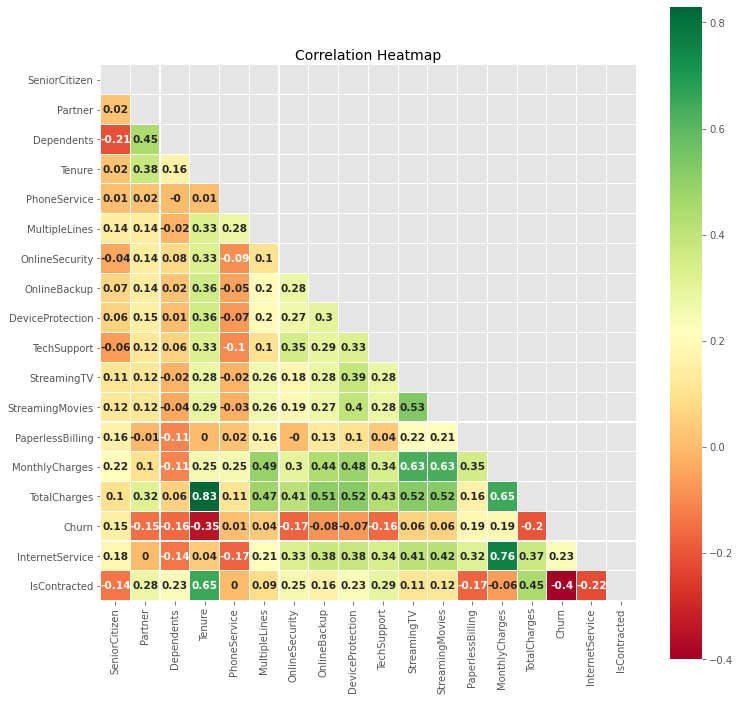

In [29]:
var_corr = round(df_cal.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

During Exploratory Data Analysis, I found some interesting details like:  
- senior citizens on average pay higher monthly bills than others 
- people with annual contracts are less likely to churn as compared to people with monthly contracts. 
- The customer who churned paid significantly higher total charges, irrespective of the contract type and type of internet service, as compared to people who did not churn. 
- People who are not senior citizens churned significantly more than senior citizens. 
- People tend to churn less with increase in tenure.

## 3. Feature Engineering

In [30]:
df_raw.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Duration
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Less than 1 year
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1-3 years
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Less than 1 year
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,More than 3 years
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Less than 1 year


In [31]:
df_raw.shape

(7032, 22)

In [32]:
#1. Do one hot encoding
#2. Do interaction terms
#3. Do polynomial features and log features for numeric
# pca is not suitable for categorical data!

# Create poly faetures
y = df_raw['Churn']
print(y.shape)
y = pd.DataFrame(y)
#resetting index
y.reset_index(inplace=True,drop=True)

X = df_raw.drop('Churn',axis=1)
# Drop Customer ID
X = X.drop('CustomerID',axis=1)
print(X.shape)

(7032,)
(7032, 20)


In [33]:
# Seperate numeric columns
X_num = X[['Tenure','MonthlyCharges','TotalCharges']]
X_num.head()

,Tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [34]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X_num)
tmp1 = pd.DataFrame(X_poly)

In [35]:
tmp1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1.0,1.0,29.85,29.85,1.0,29.85,29.85,891.0225,891.0225,8.910225e+02,1.0,29.85,29.85,891.0225,8.910225e+02,8.910225e+02,26597.021625,2.659702e+04,2.659702e+04,2.659702e+04,1.0,29.85,2.985000e+01,8.910225e+02,8.910225e+02,8.910225e+02,2.659702e+04,2.659702e+04,2.659702e+04,2.659702e+04,7.939211e+05,7.939211e+05,7.939211e+05,7.939211e+05,7.939211e+05
1,1.0,34.0,56.95,1889.50,1156.0,1936.30,64243.00,3243.3025,107607.0250,3.570210e+06,39304.0,65834.20,2184262.00,110272.2850,3.658639e+06,1.213871e+08,184706.077375,6.128220e+06,2.033235e+08,6.745912e+09,1336336.0,2238362.80,7.426491e+07,3.749258e+06,1.243937e+08,4.127163e+09,6.280007e+06,2.083595e+08,6.912998e+09,2.293610e+11,1.051901e+07,3.490021e+08,1.157927e+10,3.841797e+11,1.274640e+13
2,1.0,2.0,53.85,108.15,4.0,107.70,216.30,2899.8225,5823.8775,1.169642e+04,8.0,215.40,432.60,5799.6450,1.164776e+04,2.339285e+04,156155.441625,3.136158e+05,6.298524e+05,1.264968e+06,16.0,430.80,8.652000e+02,1.159929e+04,2.329551e+04,4.678569e+04,3.123109e+05,6.272316e+05,1.259705e+06,2.529936e+06,8.408971e+06,1.688821e+07,3.391755e+07,6.811853e+07,1.368063e+08
3,1.0,45.0,42.30,1840.75,2025.0,1903.50,82833.75,1789.2900,77863.7250,3.388361e+06,91125.0,85657.50,3727518.75,80518.0500,3.503868e+06,1.524762e+08,75686.967000,3.293636e+06,1.433277e+08,6.237125e+09,4100625.0,3854587.50,1.677383e+08,3.623312e+06,1.576740e+08,6.861430e+09,3.405914e+06,1.482136e+08,6.449744e+09,2.806706e+11,3.201559e+06,1.393208e+08,6.062760e+09,2.638304e+11,1.148099e+13
4,1.0,2.0,70.70,151.65,4.0,141.40,303.30,4998.4900,10721.6550,2.299772e+04,8.0,282.80,606.60,9996.9800,2.144331e+04,4.599545e+04,353393.243000,7.580210e+05,1.625939e+06,3.487605e+06,16.0,565.60,1.213200e+03,1.999396e+04,4.288662e+04,9.199089e+04,7.067865e+05,1.516042e+06,3.251878e+06,6.975209e+06,2.498490e+07,5.359209e+07,1.149539e+08,2.465736e+08,5.288952e+08


In [36]:
tmp1.shape

(7032, 35)

In [37]:
# Create log features
X_log = np.log(X_num)
tmp = pd.DataFrame(X_log)

# reset the index
tmp.reset_index(inplace=True,drop=True)

# Rename columns and adding _log
tmp.columns = [col+'_'+'log' for col in tmp.columns]
print(tmp.shape) 
display(tmp.head())

(7032, 3)


,Tenure_log,MonthlyCharges_log,TotalCharges_log
0,0.000000,3.396185,3.396185
1,3.526361,4.042174,7.544068
2,0.693147,3.986202,4.683519
3,3.806662,3.744787,7.517928
4,0.693147,4.258446,5.021575


In [38]:
# add new feature 
new_col = X_num['Tenure'] * X_num['MonthlyCharges']
X_num.insert(loc=3, column='Tenure*monthlycharges', value=new_col)

In [39]:
# Merge X_num, tmp1(poly features) and tmp(log features)
# Reset the index of X_num
X_num.reset_index(inplace=True,drop=True)

# Smoosh the two dataframes together
X_smoosh = pd.concat([X_num,tmp1, tmp], axis=1)
X_smoosh.shape # Look at how many more columns there are

(7032, 42)

In [40]:
X_smoosh.head()  #this is the dataframe which has the original numeric columns from the actual dataset and the log features and polynomial features

,Tenure,MonthlyCharges,TotalCharges,Tenure*monthlycharges,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,Tenure_log,MonthlyCharges_log,TotalCharges_log
0,1,29.85,29.85,29.85,1.0,1.0,29.85,29.85,1.0,29.85,29.85,891.0225,891.0225,8.910225e+02,1.0,29.85,29.85,891.0225,8.910225e+02,8.910225e+02,26597.021625,2.659702e+04,2.659702e+04,2.659702e+04,1.0,29.85,2.985000e+01,8.910225e+02,8.910225e+02,8.910225e+02,2.659702e+04,2.659702e+04,2.659702e+04,2.659702e+04,7.939211e+05,7.939211e+05,7.939211e+05,7.939211e+05,7.939211e+05,0.000000,3.396185,3.396185
1,34,56.95,1889.50,1936.30,1.0,34.0,56.95,1889.50,1156.0,1936.30,64243.00,3243.3025,107607.0250,3.570210e+06,39304.0,65834.20,2184262.00,110272.2850,3.658639e+06,1.213871e+08,184706.077375,6.128220e+06,2.033235e+08,6.745912e+09,1336336.0,2238362.80,7.426491e+07,3.749258e+06,1.243937e+08,4.127163e+09,6.280007e+06,2.083595e+08,6.912998e+09,2.293610e+11,1.051901e+07,3.490021e+08,1.157927e+10,3.841797e+11,1.274640e+13,3.526361,4.042174,7.544068
2,2,53.85,108.15,107.70,1.0,2.0,53.85,108.15,4.0,107.70,216.30,2899.8225,5823.8775,1.169642e+04,8.0,215.40,432.60,5799.6450,1.164776e+04,2.339285e+04,156155.441625,3.136158e+05,6.298524e+05,1.264968e+06,16.0,430.80,8.652000e+02,1.159929e+04,2.329551e+04,4.678569e+04,3.123109e+05,6.272316e+05,1.259705e+06,2.529936e+06,8.408971e+06,1.688821e+07,3.391755e+07,6.811853e+07,1.368063e+08,0.693147,3.986202,4.683519
3,45,42.30,1840.75,1903.50,1.0,45.0,42.30,1840.75,2025.0,1903.50,82833.75,1789.2900,77863.7250,3.388361e+06,91125.0,85657.50,3727518.75,80518.0500,3.503868e+06,1.524762e+08,75686.967000,3.293636e+06,1.433277e+08,6.237125e+09,4100625.0,3854587.50,1.677383e+08,3.623312e+06,1.576740e+08,6.861430e+09,3.405914e+06,1.482136e+08,6.449744e+09,2.806706e+11,3.201559e+06,1.393208e+08,6.062760e+09,2.638304e+11,1.148099e+13,3.806662,3.744787,7.517928
4,2,70.70,151.65,141.40,1.0,2.0,70.70,151.65,4.0,141.40,303.30,4998.4900,10721.6550,2.299772e+04,8.0,282.80,606.60,9996.9800,2.144331e+04,4.599545e+04,353393.243000,7.580210e+05,1.625939e+06,3.487605e+06,16.0,565.60,1.213200e+03,1.999396e+04,4.288662e+04,9.199089e+04,7.067865e+05,1.516042e+06,3.251878e+06,6.975209e+06,2.498490e+07,5.359209e+07,1.149539e+08,2.465736e+08,5.288952e+08,0.693147,4.258446,5.021575


In [41]:
# Feature Engineering for Categorical Variables
X_cat = X.drop(['Tenure','MonthlyCharges','TotalCharges','Duration'],axis=1)
X_cat.reset_index(drop=True,inplace=True)
#X_cat.reset_index(drop=False,inplace=True)
X_cat.head() #This has only categorical variables!

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [42]:
X_cat.reset_index(drop=False,inplace=True)
X_cat.head() #This has only categorical variables!

,index,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod
0,0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [43]:
X_cat.columns

Index(['index', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetServiceType',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'ContractType', 'PaperlessBilling',
       'PaymentMethod'],
      dtype='object')

In [44]:
cat_df = X_cat.iloc[:,1:]

columns = cat_df.columns
df_final = pd.DataFrame(X_cat['index'])
for col in columns:
    df = pd.DataFrame(cat_df[col])
    one_hot = pd.get_dummies(cat_df[col])
    df = df.join(one_hot)
    df_final = df_final.merge(df,left_index=True,right_index=True)

    
df_final = df_final.iloc[:,1:]
df_final.head()

,Gender,Female,Male,SeniorCitizen,0,1,Partner,No_x,Yes_x,Dependents,No_y,Yes_y,PhoneService,No_x,Yes_x,MultipleLines,No_y,No phone service,Yes_y,InternetServiceType,DSL,Fiber optic,No_x,OnlineSecurity,No_y,No internet service_x,Yes_x,OnlineBackup,No_x,No internet service_y,Yes_y,DeviceProtection,No_y,No internet service_x,Yes_x,TechSupport,No_x,No internet service_y,Yes_y,StreamingTV,No_y,No internet service_x,Yes_x,StreamingMovies,No_x,No internet service_y,Yes_y,ContractType,Month-to-month,One year,Two year,PaperlessBilling,No_y,Yes,PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,Female,1,0,0,1,0,Yes,0,1,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0
1,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,One year,0,1,0,No,1,0,Mailed check,0,0,0,1
2,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Mailed check,0,0,0,1
3,Male,0,1,0,1,0,No,1,0,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,One year,0,1,0,No,1,0,Bank transfer (automatic),1,0,0,0
4,Female,1,0,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,Fiber optic,0,1,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0


In [45]:
df_final.shape

(7032, 59)

In [46]:
B = ['gender','Female','Male','SeniorCitizen','Not_A_SeniorCitizen','SeniorCitizen','Partner','DoesNotHaveaPartner','HasPartner','Dependent','NoDependents','Has_Dependents',
                      'PhoneService','No_PhoneService','Has_PhoneService','MultipleLines','No_ML','NoPhoneService','HasML','InternetService','DSL_Internet','fiberOptics','NoInternet','OnlineSecurity','NotOptedforOnlineSec',
                      'NotApplicable(noInternet)','OptedforOnlineSec','OnlineBackup','NotOptedforOnlineBackup','NotApplicable(NoInternet)','OptedforOnlineBackup','DeviceProtection','NotOptedforDeviceProtection','NotApplicable(NoInternet)','OptedforDevicePro','TechSupport','notOPtedforTechSupport','NotApplicable','optedforTechssupport','StreamingTV','NotOptedTV','NotApplcable','OPtedTV','StreamingMovies',
                      'NotOptedMovies','NotApplicable','OptedMovies','Contract','Month-to-month','One year','Two year','PaperlessBilling','PaperBilling','PaperlessBilling','PaymentMethod','Bank transfer(auto)','Credit Card(auto)',
                      'Electronic check','Mailed check']
B = pd.DataFrame(B)
B.shape

(59, 1)

In [47]:
df_final.columns=['gender','Female','Male','SeniorCitizen','Not_A_SeniorCitizen','SeniorCitizen','Partner','DoesNotHaveaPartner','HasPartner','Dependent','NoDependents','Has_Dependents',
                      'PhoneService','No_PhoneService','Has_PhoneService','MultipleLines','No_ML','NoPhoneService','HasML','InternetService','DSL_Internet','fiberOptics','NoInternet','OnlineSecurity','NotOptedforOnlineSec',
                      'NotApplicable(noInternet)','OptedforOnlineSec','OnlineBackup','NotOptedforOnlineBackup','NotApplicable(NoInternet)','OptedforOnlineBackup','DeviceProtection','NotOptedforDeviceProtection','NotApplicable(NoInternet)','OptedforDevicePro','TechSupport','notOPtedforTechSupport','NotApplicable','optedforTechssupport','StreamingTV','NotOptedTV','NotApplcable','OPtedTV','StreamingMovies',
                      'NotOptedMovies','NotApplicable','OptedMovies','Contract','Month-to-month','One year','Two year','PaperlessBilling','PaperBilling','Paperless Billing','PaymentMethod','Bank transfer(auto)','Credit Card(auto)',
                      'Electronic check','Mailed check']
df_final.head()

,gender,Female,Male,SeniorCitizen,Not_A_SeniorCitizen,SeniorCitizen,Partner,DoesNotHaveaPartner,HasPartner,Dependent,NoDependents,Has_Dependents,PhoneService,No_PhoneService,Has_PhoneService,MultipleLines,No_ML,NoPhoneService,HasML,InternetService,DSL_Internet,fiberOptics,NoInternet,OnlineSecurity,NotOptedforOnlineSec,NotApplicable(noInternet),OptedforOnlineSec,OnlineBackup,NotOptedforOnlineBackup,NotApplicable(NoInternet),OptedforOnlineBackup,DeviceProtection,NotOptedforDeviceProtection,NotApplicable(NoInternet),OptedforDevicePro,TechSupport,notOPtedforTechSupport,NotApplicable,optedforTechssupport,StreamingTV,NotOptedTV,NotApplcable,OPtedTV,StreamingMovies,NotOptedMovies,NotApplicable,OptedMovies,Contract,Month-to-month,One year,Two year,PaperlessBilling,PaperBilling,Paperless Billing,PaymentMethod,Bank transfer(auto),Credit Card(auto),Electronic check,Mailed check
0,Female,1,0,0,1,0,Yes,0,1,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0
1,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,One year,0,1,0,No,1,0,Mailed check,0,0,0,1
2,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Mailed check,0,0,0,1
3,Male,0,1,0,1,0,No,1,0,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,One year,0,1,0,No,1,0,Bank transfer (automatic),1,0,0,0
4,Female,1,0,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,Fiber optic,0,1,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0


In [48]:
# Join all features engineered for categorical and continuous
df_modeling = df_final.merge(X_smoosh,left_index=True,right_index=True)

df_modeling.head() # This is the merger of categorical and numeric feature engineering
#Though,still need to standardize numeric data and get rid of original categorical variables!

,gender,Female,Male,SeniorCitizen,Not_A_SeniorCitizen,SeniorCitizen,Partner,DoesNotHaveaPartner,HasPartner,Dependent,NoDependents,Has_Dependents,PhoneService,No_PhoneService,Has_PhoneService,MultipleLines,No_ML,NoPhoneService,HasML,InternetService,DSL_Internet,fiberOptics,NoInternet,OnlineSecurity,NotOptedforOnlineSec,NotApplicable(noInternet),OptedforOnlineSec,OnlineBackup,NotOptedforOnlineBackup,NotApplicable(NoInternet),OptedforOnlineBackup,DeviceProtection,NotOptedforDeviceProtection,NotApplicable(NoInternet),OptedforDevicePro,TechSupport,notOPtedforTechSupport,NotApplicable,optedforTechssupport,StreamingTV,NotOptedTV,NotApplcable,OPtedTV,StreamingMovies,NotOptedMovies,NotApplicable,OptedMovies,Contract,Month-to-month,One year,...,PaperlessBilling,PaperBilling,Paperless Billing,PaymentMethod,Bank transfer(auto),Credit Card(auto),Electronic check,Mailed check,Tenure,MonthlyCharges,TotalCharges,Tenure*monthlycharges,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,Tenure_log,MonthlyCharges_log,TotalCharges_log
0,Female,1,0,0,1,0,Yes,0,1,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,...,Yes,0,1,Electronic check,0,0,1,0,1,29.85,29.85,29.85,1.0,1.0,29.85,29.85,1.0,29.85,29.85,891.0225,891.0225,8.910225e+02,1.0,29.85,29.85,891.0225,8.910225e+02,8.910225e+02,26597.021625,2.659702e+04,2.659702e+04,2.659702e+04,1.0,29.85,2.985000e+01,8.910225e+02,8.910225e+02,8.910225e+02,2.659702e+04,2.659702e+04,2.659702e+04,2.659702e+04,7.939211e+05,7.939211e+05,7.939211e+05,7.939211e+05,7.939211e+05,0.000000,3.396185,3.396185
1,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,One year,0,1,...,No,1,0,Mailed check,0,0,0,1,34,56.95,1889.50,1936.30,1.0,34.0,56.95,1889.50,1156.0,1936.30,64243.00,3243.3025,107607.0250,3.570210e+06,39304.0,65834.20,2184262.00,110272.2850,3.658639e+06,1.213871e+08,184706.077375,6.128220e+06,2.033235e+08,6.745912e+09,1336336.0,2238362.80,7.426491e+07,3.749258e+06,1.243937e+08,4.127163e+09,6.280007e+06,2.083595e+08,6.912998e+09,2.293610e+11,1.051901e+07,3.490021e+08,1.157927e+10,3.841797e+11,1.274640e+13,3.526361,4.042174,7.544068
2,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,...,Yes,0,1,Mailed check,0,0,0,1,2,53.85,108.15,107.70,1.0,2.0,53.85,108.15,4.0,107.70,216.30,2899.8225,5823.8775,1.169642e+04,8.0,215.40,432.60,5799.6450,1.164776e+04,2.339285e+04,156155.441625,3.136158e+05,6.298524e+05,1.264968e+06,16.0,430.80,8.652000e+02,1.159929e+04,2.329551e+04,4.678569e+04,3.123109e+05,6.272316e+05,1.259705e+06,2.529936e+06,8.408971e+06,1.688821e+07,3.391755e+07,6.811853e+07,1.368063e+08,0.693147,3.986202,4.683519
3,Male,0,1,0,1,0,No,1,0,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,One year,0,1,...,No,1,0,Bank transfer (automatic),1,0,0,0,45,42.30,1840.75,1903.50,1.0,45.0,42.30,1840.75,2025.0,1903.50,82833.75,1789.2900,77863.7250,3.388361e+06,91125.0,85657.50,3727518.75,80518.0500,3.503868e+06,1.524762e+08,75686.967000,3.293636e+06,1.433277e+08,6.237125e+09,4100625.0,3854587.50,1.677383e+08,3.623312e+06,1.576740e+08,6.861430e+09,3.405914e+06,1.482136e+08,6.449744e+09,2.806706e+11,3.201559e+06,1.393208e+08,6.062760e+09,2.638304e+11,1.148099e+13,3.806662,3.744787,7.517928
4,Female,1,0,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,Fiber optic,0,1,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,...,Yes,0,1,Electronic check,0,0,1,0,2,70.70,151.65,141.40,1.0,2.0,70.70,151.65,4.0,141.40,303.30,4998.4900,10721.6550,2.299772e+04,8.0,282.80,606.60,9996.9800,2.144331e+04,4.599545e+04,353393.243000,7.580210e+05,1.625939e+06,3.487605e+06,16.0,565.60,1.213200e+03,1.999396e+04,4.288662e+04,9.199089e+04,7.067865e+05,1.516042e+06,3.251878e+06,6.975209e+06,2.498490e+07,5.359209e+07,1.149539e+08,2.46573

In [49]:
y['Churn'].value_counts()
df_modeling.iloc[:,39:].head()

,StreamingTV,NotOptedTV,NotApplcable,OPtedTV,StreamingMovies,NotOptedMovies,NotApplicable,OptedMovies,Contract,Month-to-month,One year,Two year,PaperlessBilling,PaperBilling,Paperless Billing,PaymentMethod,Bank transfer(auto),Credit Card(auto),Electronic check,Mailed check,Tenure,MonthlyCharges,TotalCharges,Tenure*monthlycharges,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,Tenure_log,MonthlyCharges_log,TotalCharges_log
0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0,1,29.85,29.85,29.85,1.0,1.0,29.85,29.85,1.0,29.85,29.85,891.0225,891.0225,8.910225e+02,1.0,29.85,29.85,891.0225,8.910225e+02,8.910225e+02,26597.021625,2.659702e+04,2.659702e+04,2.659702e+04,1.0,29.85,2.985000e+01,8.910225e+02,8.910225e+02,8.910225e+02,2.659702e+04,2.659702e+04,2.659702e+04,2.659702e+04,7.939211e+05,7.939211e+05,7.939211e+05,7.939211e+05,7.939211e+05,0.000000,3.396185,3.396185
1,No,1,0,0,No,1,0,0,One year,0,1,0,No,1,0,Mailed check,0,0,0,1,34,56.95,1889.50,1936.30,1.0,34.0,56.95,1889.50,1156.0,1936.30,64243.00,3243.3025,107607.0250,3.570210e+06,39304.0,65834.20,2184262.00,110272.2850,3.658639e+06,1.213871e+08,184706.077375,6.128220e+06,2.033235e+08,6.745912e+09,1336336.0,2238362.80,7.426491e+07,3.749258e+06,1.243937e+08,4.127163e+09,6.280007e+06,2.083595e+08,6.912998e+09,2.293610e+11,1.051901e+07,3.490021e+08,1.157927e+10,3.841797e+11,1.274640e+13,3.526361,4.042174,7.544068
2,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Mailed check,0,0,0,1,2,53.85,108.15,107.70,1.0,2.0,53.85,108.15,4.0,107.70,216.30,2899.8225,5823.8775,1.169642e+04,8.0,215.40,432.60,5799.6450,1.164776e+04,2.339285e+04,156155.441625,3.136158e+05,6.298524e+05,1.264968e+06,16.0,430.80,8.652000e+02,1.159929e+04,2.329551e+04,4.678569e+04,3.123109e+05,6.272316e+05,1.259705e+06,2.529936e+06,8.408971e+06,1.688821e+07,3.391755e+07,6.811853e+07,1.368063e+08,0.693147,3.986202,4.683519
3,No,1,0,0,No,1,0,0,One year,0,1,0,No,1,0,Bank transfer (automatic),1,0,0,0,45,42.30,1840.75,1903.50,1.0,45.0,42.30,1840.75,2025.0,1903.50,82833.75,1789.2900,77863.7250,3.388361e+06,91125.0,85657.50,3727518.75,80518.0500,3.503868e+06,1.524762e+08,75686.967000,3.293636e+06,1.433277e+08,6.237125e+09,4100625.0,3854587.50,1.677383e+08,3.623312e+06,1.576740e+08,6.861430e+09,3.405914e+06,1.482136e+08,6.449744e+09,2.806706e+11,3.201559e+06,1.393208e+08,6.062760e+09,2.638304e+11,1.148099e+13,3.806662,3.744787,7.517928
4,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0,2,70.70,151.65,141.40,1.0,2.0,70.70,151.65,4.0,141.40,303.30,4998.4900,10721.6550,2.299772e+04,8.0,282.80,606.60,9996.9800,2.144331e+04,4.599545e+04,353393.243000,7.580210e+05,1.625939e+06,3.487605e+06,16.0,565.60,1.213200e+03,1.999396e+04,4.288662e+04,9.199089e+04,7.067865e+05,1.516042e+06,3.251878e+06,6.975209e+06,2.498490e+07,5.359209e+07,1.149539e+08,2.465736e+08,5.288952e+08,0.693147,4.258446,5.021575


In [50]:
# Data Standardization
from sklearn import preprocessing

std = X_smoosh.values 

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(std)
x_scaled

array([[0.        , 0.11542289, 0.0012751 , ..., 0.        , 0.26271103,
        0.07535328],
       [0.46478873, 0.38507463, 0.21586661, ..., 0.8245583 , 0.60763294,
        0.75140267],
       [0.01408451, 0.35422886, 0.01031041, ..., 0.16207652, 0.5777474 ,
        0.28517155],
       ...,
       [0.14084507, 0.11293532, 0.03780868, ..., 0.56069265, 0.2582203 ,
        0.47492373],
       [0.04225352, 0.55870647, 0.03321025, ..., 0.32415305, 0.75034671,
        0.45500766],
       [0.91549296, 0.86965174, 0.78764136, ..., 0.97965439, 0.93758797,
        0.96118816]])

In [51]:
# Let's convert that x_scaled, numpy array to a pandas dataframe
# Note that x_scaled has no column labels
df_mmstd = pd.DataFrame(x_scaled, columns=X_smoosh.columns)
df_mmstd.head()
# df_mmstd has the all the numeric columns standardized

,Tenure,MonthlyCharges,TotalCharges,Tenure*monthlycharges,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,Tenure_log,MonthlyCharges_log,TotalCharges_log
0,0.000000,0.115423,0.001275,0.001295,0.0,0.000000,0.115423,0.001275,0.000000,0.001295,0.000018,0.040524,0.000522,0.000007,0.000000,0.000018,2.454356e-07,0.000530,0.000007,9.899038e-08,0.012298,0.000163,0.000002,3.045893e-08,0.000000e+00,2.493052e-07,3.408827e-09,0.000007,1.006943e-07,1.374866e-09,0.000165,0.000002,3.102732e-08,4.230406e-10,0.003437,0.000046,6.307774e-07,8.637099e-09,1.175947e-10,0.000000,0.262711,0.075353
1,0.464789,0.385075,0.215867,0.224763,0.0,0.464789,0.385075,0.215867,0.222844,0.224763,0.102712,0.211369,0.104180,0.047330,0.105300,0.106916,4.851504e-02,0.108299,0.049337,2.235215e-02,0.107060,0.050058,0.022764,1.029819e-02,4.972621e-02,5.050053e-02,2.291006e-02,0.051283,2.330005e-02,1.055521e-02,0.052034,0.023662,1.075019e-02,4.863038e-03,0.052370,0.024023,1.091756e-02,4.959927e-03,2.240517e-03,0.824558,0.607633,0.751403
2,0.014085,0.354229,0.010310,0.010421,0.0,0.014085,0.354229,0.010310,0.000579,0.010421,0.000316,0.186423,0.005314,0.000150,0.000019,0.000319,9.191065e-06,0.005366,0.000152,4.242474e-06,0.089948,0.002510,0.000070,1.920936e-06,5.581633e-07,9.295362e-06,2.611069e-07,0.000154,4.297266e-06,1.187504e-07,0.002535,0.000070,1.948598e-06,5.350021e-08,0.041753,0.001154,3.186186e-05,8.778273e-07,2.402537e-08,0.162077,0.577747,0.285172
3,0.619718,0.239303,0.210241,0.220919,0.0,0.619718,0.239303,0.210241,0.390507,0.220919,0.132443,0.105765,0.075289,0.044919,0.244139,0.139118,8.279288e-02,0.078983,0.047250,2.807689e-02,0.041720,0.026879,0.016047,9.521481e-03,1.525879e-01,8.696507e-02,5.174579e-02,0.049560,2.953377e-02,1.754810e-02,0.028195,0.016832,1.002980e-02,5.950932e-03,0.015551,0.009585,5.716242e-03,3.406164e-03,2.018087e-03,0.890100,0.448845,0.747142
4,0.014085,0.521891,0.015330,0.014371,0.0,0.014085,0.521891,0.015330,0.000579,0.014371,0.000455,0.338848,0.010071,0.000300,0.000019,0.000429,1.305584e-05,0.009501,0.000284,8.404514e-06,0.208162,0.006144,0.000181,5.313976e-06,5.581633e-07,1.233666e-05,3.684618e-07,0.000269,7.966865e-06,2.343626e-07,0.005807,0.000171,5.046569e-06,1.477513e-07,0.125156,0.003682,1.082681e-04,3.181761e-06,9.294537e-08,0.162077,0.723110,0.340270


In [52]:
df_final.head()

,gender,Female,Male,SeniorCitizen,Not_A_SeniorCitizen,SeniorCitizen,Partner,DoesNotHaveaPartner,HasPartner,Dependent,NoDependents,Has_Dependents,PhoneService,No_PhoneService,Has_PhoneService,MultipleLines,No_ML,NoPhoneService,HasML,InternetService,DSL_Internet,fiberOptics,NoInternet,OnlineSecurity,NotOptedforOnlineSec,NotApplicable(noInternet),OptedforOnlineSec,OnlineBackup,NotOptedforOnlineBackup,NotApplicable(NoInternet),OptedforOnlineBackup,DeviceProtection,NotOptedforDeviceProtection,NotApplicable(NoInternet),OptedforDevicePro,TechSupport,notOPtedforTechSupport,NotApplicable,optedforTechssupport,StreamingTV,NotOptedTV,NotApplcable,OPtedTV,StreamingMovies,NotOptedMovies,NotApplicable,OptedMovies,Contract,Month-to-month,One year,Two year,PaperlessBilling,PaperBilling,Paperless Billing,PaymentMethod,Bank transfer(auto),Credit Card(auto),Electronic check,Mailed check
0,Female,1,0,0,1,0,Yes,0,1,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0
1,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,One year,0,1,0,No,1,0,Mailed check,0,0,0,1
2,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Mailed check,0,0,0,1
3,Male,0,1,0,1,0,No,1,0,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,One year,0,1,0,No,1,0,Bank transfer (automatic),1,0,0,0
4,Female,1,0,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,Fiber optic,0,1,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0


In [53]:
df_final.shape

(7032, 59)

In [54]:
df_final.columns

Index(['gender', 'Female', 'Male', 'SeniorCitizen', 'Not_A_SeniorCitizen',
       'SeniorCitizen', 'Partner', 'DoesNotHaveaPartner', 'HasPartner',
       'Dependent', 'NoDependents', 'Has_Dependents', 'PhoneService',
       'No_PhoneService', 'Has_PhoneService', 'MultipleLines', 'No_ML',
       'NoPhoneService', 'HasML', 'InternetService', 'DSL_Internet',
       'fiberOptics', 'NoInternet', 'OnlineSecurity', 'NotOptedforOnlineSec',
       'NotApplicable(noInternet)', 'OptedforOnlineSec', 'OnlineBackup',
       'NotOptedforOnlineBackup', 'NotApplicable(NoInternet)',
       'OptedforOnlineBackup', 'DeviceProtection',
       'NotOptedforDeviceProtection', 'NotApplicable(NoInternet)',
       'OptedforDevicePro', 'TechSupport', 'notOPtedforTechSupport',
       'NotApplicable', 'optedforTechssupport', 'StreamingTV', 'NotOptedTV',
       'NotApplcable', 'OPtedTV', 'StreamingMovies', 'NotOptedMovies',
       'NotApplicable', 'OptedMovies', 'Contract', 'Month-to-month',
       'One year', 'Two 

In [55]:
df_final_without = df_final.drop(['gender','SeniorCitizen','Partner','Dependent','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
'Contract','PaymentMethod','PaperlessBilling'], axis=1,inplace=False)

In [56]:
df_final_without.shape

(7032, 42)

In [57]:
# Merge Standardization with Categorical
df_std_modelling = df_final_without.merge(df_mmstd, left_index=True, right_index=True)
df_std_modelling.head() #megered dataframe for modeling (standardized numeric cols and dummy vars for categorical)

,Female,Male,Not_A_SeniorCitizen,DoesNotHaveaPartner,HasPartner,NoDependents,Has_Dependents,No_PhoneService,Has_PhoneService,No_ML,NoPhoneService,HasML,DSL_Internet,fiberOptics,NoInternet,NotOptedforOnlineSec,NotApplicable(noInternet),OptedforOnlineSec,NotOptedforOnlineBackup,NotApplicable(NoInternet),OptedforOnlineBackup,NotOptedforDeviceProtection,NotApplicable(NoInternet),OptedforDevicePro,notOPtedforTechSupport,NotApplicable,optedforTechssupport,NotOptedTV,NotApplcable,OPtedTV,NotOptedMovies,NotApplicable,OptedMovies,Month-to-month,One year,Two year,PaperBilling,Paperless Billing,Bank transfer(auto),Credit Card(auto),Electronic check,Mailed check,Tenure,MonthlyCharges,TotalCharges,Tenure*monthlycharges,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,Tenure_log,MonthlyCharges_log,TotalCharges_log
0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0.000000,0.115423,0.001275,0.001295,0.0,0.000000,0.115423,0.001275,0.000000,0.001295,0.000018,0.040524,0.000522,0.000007,0.000000,0.000018,2.454356e-07,0.000530,0.000007,9.899038e-08,0.012298,0.000163,0.000002,3.045893e-08,0.000000e+00,2.493052e-07,3.408827e-09,0.000007,1.006943e-07,1.374866e-09,0.000165,0.000002,3.102732e-08,4.230406e-10,0.003437,0.000046,6.307774e-07,8.637099e-09,1.175947e-10,0.000000,0.262711,0.075353
1,0,1,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0.464789,0.385075,0.215867,0.224763,0.0,0.464789,0.385075,0.215867,0.222844,0.224763,0.102712,0.211369,0.104180,0.047330,0.105300,0.106916,4.851504e-02,0.108299,0.049337,2.235215e-02,0.107060,0.050058,0.022764,1.029819e-02,4.972621e-02,5.050053e-02,2.291006e-02,0.051283,2.330005e-02,1.055521e-02,0.052034,0.023662,1.075019e-02,4.863038e-03,0.052370,0.024023,1.091756e-02,4.959927e-03,2.240517e-03,0.824558,0.607633,0.751403
2,0,1,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0.014085,0.354229,0.010310,0.010421,0.0,0.014085,0.354229,0.010310,0.000579,0.010421,0.000316,0.186423,0.005314,0.000150,0.000019,0.000319,9.191065e-06,0.005366,0.000152,4.242474e-06,0.089948,0.002510,0.000070,1.920936e-06,5.581633e-07,9.295362e-06,2.611069e-07,0.000154,4.297266e-06,1.187504e-07,0.002535,0.000070,1.948598e-06,5.350021e-08,0.041753,0.001154,3.186186e-05,8.778273e-07,2.402537e-08,0.162077,0.577747,0.285172
3,0,1,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0.619718,0.239303,0.210241,0.220919,0.0,0.619718,0.239303,0.210241,0.390507,0.220919,0.132443,0.105765,0.075289,0.044919,0.244139,0.139118,8.279288e-02,0.078983,0.047250,2.807689e-02,0.041720,0.026879,0.016047,9.521481e-03,1.525879e-01,8.696507e-02,5.174579e-02,0.049560,2.953377e-02,1.754810e-02,0.028195,0.016832,1.002980e-02,5.950932e-03,0.015551,0.009585,5.716242e-03,3.406164e-03,2.018087e-03,0.890100,0.448845,0.747142
4,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0.014085,0.521891,0.015330,0.014371,0.0,0.014085,0.521891,0.015330,0.000579,0.014371,0.000455,0.338848,0.010071,0.000300,0.000019,0.000429,1.305584e-05,0.009501,0.000284,8.404514e-06,0.208162,0.006144,0.000181,5.313976e-06,5.581633e-07,1.233666e-05,3.684618e-07,0.000269,7.966865e-06,2.343626e-07,0.005807,0.000171,5.046569e-06,1.477513e-07,0.125156,0.003682,1.082681e-04,3.181761e-06,9.294537e-08,0.162077,0.723110,0.340270


In [58]:
col = np.array(df_std_modelling.columns)
col

array(['Female', 'Male', 'Not_A_SeniorCitizen', 'DoesNotHaveaPartner',
       'HasPartner', 'NoDependents', 'Has_Dependents', 'No_PhoneService',
       'Has_PhoneService', 'No_ML', 'NoPhoneService', 'HasML',
       'DSL_Internet', 'fiberOptics', 'NoInternet',
       'NotOptedforOnlineSec', 'NotApplicable(noInternet)',
       'OptedforOnlineSec', 'NotOptedforOnlineBackup',
       'NotApplicable(NoInternet)', 'OptedforOnlineBackup',
       'NotOptedforDeviceProtection', 'NotApplicable(NoInternet)',
       'OptedforDevicePro', 'notOPtedforTechSupport', 'NotApplicable',
       'optedforTechssupport', 'NotOptedTV', 'NotApplcable', 'OPtedTV',
       'NotOptedMovies', 'NotApplicable', 'OptedMovies', 'Month-to-month',
       'One year', 'Two year', 'PaperBilling', 'Paperless Billing',
       'Bank transfer(auto)', 'Credit Card(auto)', 'Electronic check',
       'Mailed check', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'Tenure*monthlycharges', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


### handling with imbalance data
Resampling  
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

In [59]:
df_std_modelling.dtypes

Female                           uint8
Male                             uint8
Not_A_SeniorCitizen              uint8
DoesNotHaveaPartner              uint8
HasPartner                       uint8
NoDependents                     uint8
Has_Dependents                   uint8
No_PhoneService                  uint8
Has_PhoneService                 uint8
No_ML                            uint8
NoPhoneService                   uint8
HasML                            uint8
DSL_Internet                     uint8
fiberOptics                      uint8
NoInternet                       uint8
NotOptedforOnlineSec             uint8
NotApplicable(noInternet)        uint8
OptedforOnlineSec                uint8
NotOptedforOnlineBackup          uint8
NotApplicable(NoInternet)        uint8
OptedforOnlineBackup             uint8
NotOptedforDeviceProtection      uint8
NotApplicable(NoInternet)        uint8
OptedforDevicePro                uint8
notOPtedforTechSupport           uint8
NotApplicable            

In [60]:
df_std_modelling

,Female,Male,Not_A_SeniorCitizen,DoesNotHaveaPartner,HasPartner,NoDependents,Has_Dependents,No_PhoneService,Has_PhoneService,No_ML,NoPhoneService,HasML,DSL_Internet,fiberOptics,NoInternet,NotOptedforOnlineSec,NotApplicable(noInternet),OptedforOnlineSec,NotOptedforOnlineBackup,NotApplicable(NoInternet),OptedforOnlineBackup,NotOptedforDeviceProtection,NotApplicable(NoInternet),OptedforDevicePro,notOPtedforTechSupport,NotApplicable,optedforTechssupport,NotOptedTV,NotApplcable,OPtedTV,NotOptedMovies,NotApplicable,OptedMovies,Month-to-month,One year,Two year,PaperBilling,Paperless Billing,Bank transfer(auto),Credit Card(auto),Electronic check,Mailed check,Tenure,MonthlyCharges,TotalCharges,Tenure*monthlycharges,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,Tenure_log,MonthlyCharges_log,TotalCharges_log
0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0.000000,0.115423,0.001275,0.001295,0.0,0.000000,0.115423,0.001275,0.000000,0.001295,0.000018,0.040524,0.000522,0.000007,0.000000,0.000018,2.454356e-07,0.000530,0.000007,9.899038e-08,0.012298,0.000163,0.000002,3.045893e-08,0.000000e+00,2.493052e-07,3.408827e-09,0.000007,1.006943e-07,1.374866e-09,0.000165,0.000002,3.102732e-08,4.230406e-10,0.003437,0.000046,6.307774e-07,8.637099e-09,1.175947e-10,0.000000,0.262711,0.075353
1,0,1,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0.464789,0.385075,0.215867,0.224763,0.0,0.464789,0.385075,0.215867,0.222844,0.224763,0.102712,0.211369,0.104180,0.047330,0.105300,0.106916,4.851504e-02,0.108299,0.049337,2.235215e-02,0.107060,0.050058,0.022764,1.029819e-02,4.972621e-02,5.050053e-02,2.291006e-02,0.051283,2.330005e-02,1.055521e-02,0.052034,0.023662,1.075019e-02,4.863038e-03,0.052370,0.024023,1.091756e-02,4.959927e-03,2.240517e-03,0.824558,0.607633,0.751403
2,0,1,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0.014085,0.354229,0.010310,0.010421,0.0,0.014085,0.354229,0.010310,0.000579,0.010421,0.000316,0.186423,0.005314,0.000150,0.000019,0.000319,9.191065e-06,0.005366,0.000152,4.242474e-06,0.089948,0.002510,0.000070,1.920936e-06,5.581633e-07,9.295362e-06,2.611069e-07,0.000154,4.297266e-06,1.187504e-07,0.002535,0.000070,1.948598e-06,5.350021e-08,0.041753,0.001154,3.186186e-05,8.778273e-07,2.402537e-08,0.162077,0.577747,0.285172
3,0,1,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0.619718,0.239303,0.210241,0.220919,0.0,0.619718,0.239303,0.210241,0.390507,0.220919,0.132443,0.105765,0.075289,0.044919,0.244139,0.139118,8.279288e-02,0.078983,0.047250,2.807689e-02,0.041720,0.026879,0.016047,9.521481e-03,1.525879e-01,8.696507e-02,5.174579e-02,0.049560,2.953377e-02,1.754810e-02,0.028195,0.016832,1.002980e-02,5.950932e-03,0.015551,0.009585,5.716242e-03,3.406164e-03,2.018087e-03,0.890100,0.448845,0.747142
4,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0.014085,0.521891,0.015330,0.014371,0.0,0.014085,0.521891,0.015330,0.000579,0.014371,0.000455,0.338848,0.010071,0.000300,0.000019,0.000429,1.305584e-05,0.009501,0.000284,8.404514e-06,0.208162,0.006144,0.000181,5.313976e-06,5.581633e-07,1.233666e-05,3.684618e-07,0.000269,7.966865e-06,2.343626e-07,0.005807,0.000171,5.046569e-06,1.477513e-07,0.125156,0.003682,1.082681e-04,3.181761e-06,9.294537e-08,0.162077,0.723110,0.340270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0.323944,0.662189,0.227521,0.236356,0.0,0.323944,0.662189,0.227521,0.110940,0.236356,0.076370,0.498092,0.163614,0.052525,0.037034,0.079317,2.546554e-02,0.1696

In [61]:
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7027,No
7028,No
7029,No
7030,Yes


In [62]:
df_std_modelling,y = make_classification(n_features = 84, n_samples=2000) 
# Make classification default = 20, so I need to set the number
ros = u.RandomUnderSampler(sampling_strategy='majority')
X_resampled, Y_resampled = ros.fit_resample(df_std_modelling, y)

In [63]:
X_resampled = pd.DataFrame(X_resampled)
print(X_resampled.shape)

Y_resampled = pd.DataFrame(Y_resampled)
print(Y_resampled.shape)

(2000, 84)
(2000, 1)


In [64]:
Y_resampled.head()

,0
0,0
1,0
2,0
3,0
4,0


In [65]:
Y_resampled = Y_resampled.rename(columns={0:'Churn'})

## 4. Modeling

In [66]:
seed = 1
X_train, X_test, y_train, y_test =train_test_split(X_resampled, Y_resampled, 
                                                   stratify=Y_resampled, 
                                                   test_size=0.2, 
                                                   random_state=seed)

In [67]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 84)
(1600, 1)
(400, 84)
(400, 1)


In [68]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83
957,0.248032,0.950380,-0.754558,-0.865851,0.318392,0.973053,-0.357751,0.490843,0.747506,-0.189073,0.866636,0.036947,0.072502,-0.945583,1.452644,-0.626659,0.885192,-1.766575,-0.980114,1.595951,0.058651,0.372674,-0.308426,0.175210,-0.090707,-1.339485,1.887637,-0.726843,-0.410063,0.162478,0.934111,-0.072257,-0.709787,-0.427676,-0.967235,0.444666,-1.122534,0.346837,0.502008,1.665366,-0.439840,0.514764,-0.608789,0.819060,-0.103294,-0.728221,-0.286872,-0.618017,1.693343,-1.054386,-0.338322,1.089806,1.931744,-0.260198,-1.718657,2.064554,-0.379561,1.944536,0.113926,0.301223,-1.920510,-0.009927,1.564560,0.798214,-0.738915,-1.013118,-2.240286,-1.395569,-0.680746,-0.057365,-0.562048,0.582092,1.788209,-0.821833,-1.325955,-0.446817,-1.106000,0.408048,-0.108036,0.685948,0.740996,-1.100782,-1.864800,-2.284063
800,-0.080876,2.617595,0.449594,1.367586,1.173931,0.591798,0.350070,1.260721,2.148343,0.456951,-0.553823,0.771865,0.073365,-0.020130,0.525190,-0.660405,0.296830,-1.181345,-0.823597,2.508836,1.501192,-0.582405,0.460812,-2.424941,-0.917686,0.357351,0.379180,1.193768,-0.466295,-0.381792,-1.661651,0.617300,0.100639,-0.335351,-0.488770,-0.059263,1.735232,-2.093706,1.400292,-0.671545,-0.086337,0.477495,0.171134,-0.387320,0.677856,-0.605332,0.573100,-1.693916,-0.423325,0.449306,-0.568990,-0.704056,-0.476903,-1.043925,0.548989,0.673036,-1.930871,-0.511978,-0.078124,0.036048,1.773140,0.588715,-0.304336,1.341285,-0.490621,-0.345217,-1.384768,-0.273520,1.338576,-0.632651,1.433931,-0.906292,-0.057514,1.252548,-0.472589,-1.145796,0.837632,0.497980,0.842928,0.483275,-0.181120,0.231188,-1.766548,0.572455
956,-0.509602,-0.902669,0.770374,-0.354482,0.582568,1.373054,-0.124528,-0.308771,0.418359,-1.232899,-1.380824,-0.658722,-0.033040,-0.072128,-0.527040,1.189458,1.236356,-0.382605,-0.913413,0.121547,0.824076,0.323783,-1.005851,1.213318,0.384496,-2.199562,0.416781,-1.802875,0.186046,0.793723,-0.035348,0.477440,1.308188,0.435590,-2.073761,1.101736,0.835266,0.712427,-0.854389,-0.358571,0.113061,0.346309,-0.384905,2.025335,0.237668,1.015701,1.382646,-1.882106,-0.177469,-2.662582,-0.895368,0.613456,0.944581,1.554626,-0.269385,-1.583873,-0.503089,-0.027279,-0.729145,-0.200837,-0.782387,-0.511396,-0.150564,0.269586,-0.286642,0.677294,-0.006592,1.252431,-0.755448,-0.368732,0.040624,0.701795,-2.038219,0.979407,0.681684,-0.490617,1.337963,1.739558,-1.239496,-0.013131,-0.905809,0.330909,-1.207301,-0.542210
1752,0.714294,-0.654133,0.605759,0.715560,1.290286,-1.047604,-1.504225,0.387433,0.560959,-2.543867,-0.374291,-0.981180,-1.139253,-0.595077,-0.945275,0.547248,0.464997,1.710284,2.253385,0.208323,1.160644,1.382808,0.499344,-0.575278,0.260397,0.990975,1.636268,-0.859207,-0.923856,-0.366170,0.092530,-0.218196,0.006548,-0.221087,1.422237,0.260054,0.230221,0.134758,-0.539473,0.162256,-0.224866,-0.134985,0.636462,-0.911774,-0.192269,1.541444,-0.896545,-0.404004,-0.031249,-0.073488,-0.098162,-0.451133,-1.363954,1.246088,-1.168152,0.594445,0.184141,-0.663870,-1.570765,-0.500525,0.248469,0.593611,-0.977169,0.335463,-1.659781,1.010369,0.122144,1.547419,-1.375510,-0.995718,-0.056419,1.237602,-0.517980,-0.340408,0.687829,1.489271,1.458459,-1.157254,-0.410445,-0.074222,0.954910,0.522590,0.466665,0.843605
525,0.048437,-1.015090,0.252530,-1.845930,0.628085,1.702361,-0.484555,1.849478,0.056161,0.434579,0.083362,-0.015994,-1.176871,-0.639727,0.716555,0.377752,-0.307557,0.115140,0.942054,-0.301202,0.420820,-0.785651,0.590801,-0.285481,0.829043,0.104685,-0.413573,1.091745,-0.239176,0.434128,1.872655,-0.707642,-0.714910,0.609938,1.135804,-0.058351,0.934494,-0.980910,-1.914781,0.623166,-0.163747,0.398942,-1.077832,1.298686,1.210873,0.585707,0.542178,-0.977187,1.836917,-1.312208,-0.607835,-1.274254,0.737619,-0.011397,-1.240520,-0.007842,0.324129,

### 4.1. building model

In [69]:
def telecom_churn_prediction(algorithm,training_x,testing_x,
                                 training_y, testing_y):
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)

In [70]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
telecom_churn_prediction(knn,X_train,X_test,
                             y_train,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.74      0.75       200
           1       0.75      0.76      0.75       200

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400

Accuracy Score   :  0.75
Area under curve :  0.75


In [71]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


telecom_churn_prediction(xgc,X_train,X_test,y_train,y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       200
           1       0.94      0.94      0.94       200

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

Accuracy Score   :  0.945
Area under curve :  0.945


### 4.2. Comparision of eight algorithms

In [72]:
#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [73]:
logit = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC(probability=True)
nb = GaussianNB()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()

In [74]:
#outputs for every model
model1 = model_report(logit,X_train,X_test,y_train,y_test,
                      "Logistic Regression")
model2 = model_report(knn,X_train,X_test,y_train,y_test,
                      "KNN Classifier")
model3 = model_report(svc,X_train,X_test,y_train,y_test,
                      "SVM Classifier")
model4 = model_report(nb,X_train,X_test,y_train,y_test,
                      "Naive Bayes")
model5 = model_report(dtc,X_train,X_test,y_train,y_test,
                      "Decision Tree")
model6 = model_report(rfc,X_train,X_test,y_train,y_test,
                      "Random Forest")
model7 = model_report(gbc,X_train,X_test,y_train,y_test,
                      "Gradient Boosting")
model8 = model_report(xgb,X_train,X_test,y_train,y_test,
                      "XGBoost Classifier")

In [75]:
#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,
                                model7,model8],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1)
model_performances

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Logistic Regression,0.9325,0.930,0.934673,0.932331,0.9325,0.865
1,KNN Classifier,0.7500,0.755,0.747525,0.751244,0.7500,0.500
2,SVM Classifier,0.9400,0.930,0.948980,0.939394,0.9400,0.880
3,Naive Bayes,0.9375,0.935,0.939698,0.937343,0.9375,0.875
4,Decision Tree,0.9150,0.925,0.906863,0.915842,0.9150,0.830
5,Random Forest,0.9400,0.945,0.935644,0.940299,0.9400,0.880
6,Gradient Boosting,0.9450,0.945,0.945000,0.945000,0.9450,0.890
7,XGBoost Classifier,0.9500,0.945,0.954545,0.949749,0.9500,0.900


### 4.3. Visualizing of model metrics

In [76]:
def output_tracer(metric) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7))
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",                      
                        xaxis = dict(title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(zerolinewidth=1,ticklen=5,gridwidth=2),
                                     margin = dict(l = 250),
                                     height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score")
trace2  = output_tracer('Recall_score')
trace3  = output_tracer('Precision')
trace4  = output_tracer('f1_score')
trace5  = output_tracer('Kappa_metric')

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

### 4.4. Confusion matrices

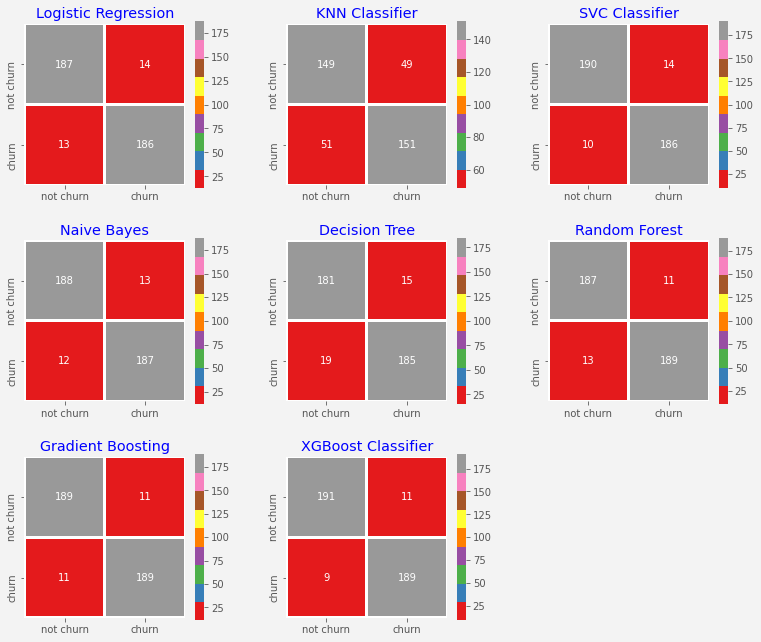

In [77]:
lst    = [logit,knn, svc, nb, dtc,rfc,gbc,xgb]

length = len(lst)

mods   = ['Logistic Regression', 'KNN Classifier', 'SVC Classifier', 'Naive Bayes',
          'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost Classifier']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(X_test)
    conf_matrix = confusion_matrix(predictions, y_test)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

### 4.5. ROC - Curves

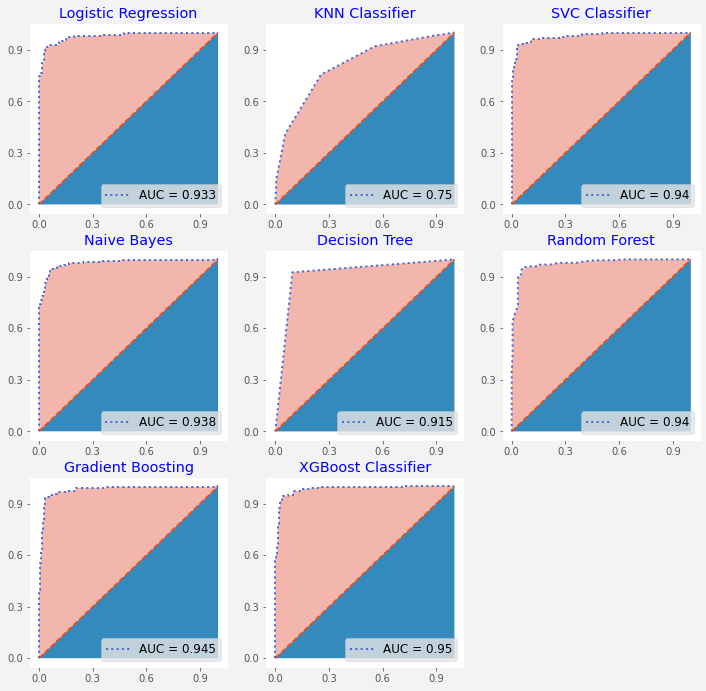

In [78]:
lst    = [logit,knn, svc, nb, dtc,rfc,gbc,xgb]

length = len(lst)

mods   = ['Logistic Regression', 'KNN Classifier', 'SVC Classifier', 'Naive Bayes',
          'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost Classifier']

fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test)
    predictions   = i.predict(X_test)
    fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",
             linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1])
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("w")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

### 4.6. Precision-recall curves

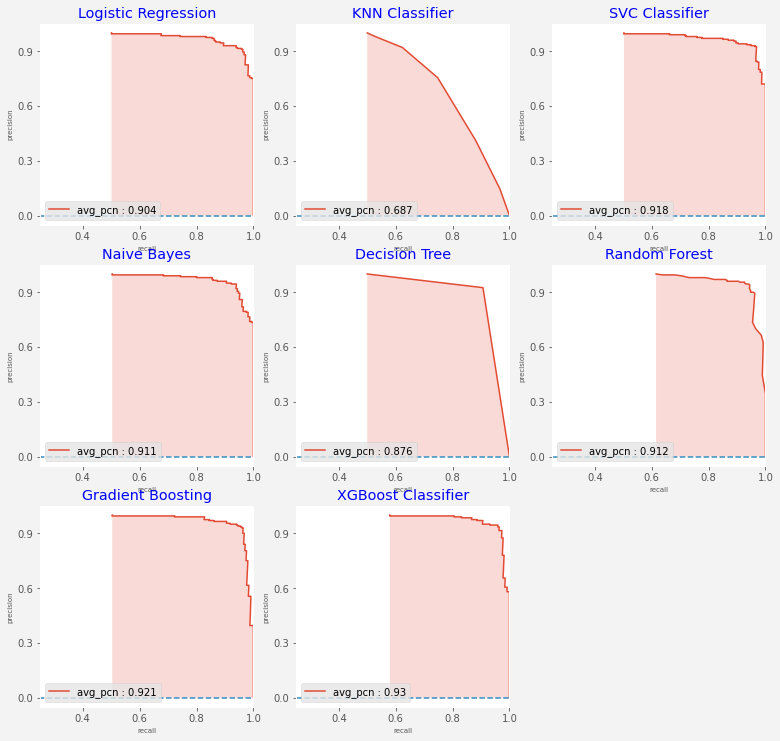

In [79]:
lst    = [logit,knn, svc, nb, dtc,rfc,gbc,xgb]

length = len(lst)

mods   = ['Logistic Regression', 'KNN Classifier', 'SVC Classifier', 'Naive Bayes',
          'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost Classifier']


fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test)
    predictions   = i.predict(X_test)
    recall,precision,thresholds = precision_recall_curve(y_test,probabilities[:,1])
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,predictions),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = "lower left",
               prop = {"size" : 10})
    qx.set_facecolor("w")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xlabel("recall",fontsize =7)
    plt.ylabel("precision",fontsize =7)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))

## Conclusion

Since we generated a model based on Churn and Existing customers, which help to classify both of them. We can use same model on existing customers to find the probability of churn. Based on this analysis, we can help retention team to analyze high risk churn customers before they leave the company.